In [14]:
import os

os.chdir("/".join(["D:", "Users", "nicol", "Documents", "Uni", "Master", "3rd Semester", "Thesis"]))
print(os.getcwd())

D:\Users\nicol\Documents\Uni\Master\3rd Semester\Thesis


In [15]:
from sklearn.metrics import accuracy_score
import tensorflow as tf
from lottery.Callbacks import FreezeCallback, LotteryCallback
from lottery.Combiner import *
from lottery.LotteryTicket import LotteryTicket
from lottery.Masker import *
from lottery.Models import *
from lottery.ModelSelector import *
from lottery.ExperimentSearch import ExperimentSearch

from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adadelta, Adam, SGD

In [16]:
train, test = tf.keras.datasets.cifar10.load_data()
train_images, train_labels = train
valid_test_images, valid_test_labels = test
train_images = train_images / 255.
valid_test_images = valid_test_images / 255.
valid_images = valid_test_images[:5000]
valid_labels = valid_test_labels[:5000]
test_images = valid_test_images[5000:]
test_labels = valid_test_labels[5000:]
print(train_images.shape, valid_images.shape, test_images.shape)
print(train_labels.shape, valid_labels.shape, test_labels.shape)

(50000, 32, 32, 3) (5000, 32, 32, 3) (5000, 32, 32, 3)
(50000, 1) (5000, 1) (5000, 1)


In [17]:
def weights_0_percentage(model):
    for l in model.model.layers:
        if len(l.get_weights()) == 0:
            continue
        w = l.get_weights()[0]
        print(w.shape)
        print(sum(sum(w == 0)), " / ", (w.shape[0] * w.shape[1]))
        print(sum(sum(w == 0)) / (w.shape[0] * w.shape[1]))

In [ ]:
def log_args(fun):
    def inner(self, *args, **kwargs):
        print("{} called with args {} and kwargs {}".format(fun.__name__, args, kwargs.keys()))
        return fun(self, *args, **kwargs)
    return inner

In [18]:
epochs = 40
percentage = 78.9

In [ ]:
es = ExperimentSearch(keras.models.load_model("cifar_before_training_maskingsgd.h5", custom_objects={"MaskingSGD": MaskingSGD}),
                      MaskingSGD(),
                      sparse_categorical_crossentropy,
                      ['sparse_categorical_accuracy'],
                      [DefaultCombiner()],
                      [AllModelsSelector()],
                      [FMagMasker],
                      5,
                      percentage,
                      "cifar10")

es.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), epochs=epochs, test_data=(test_images, test_labels))

5
INFO:tensorflow:Assets written to: models/cifar10/0\assets
INFO:tensorflow:Assets written to: models/cifar10/1\assets
INFO:tensorflow:Assets written to: models/cifar10/2\assets
INFO:tensorflow:Assets written to: models/cifar10/3\assets
INFO:tensorflow:Assets written to: models/cifar10/4\assets


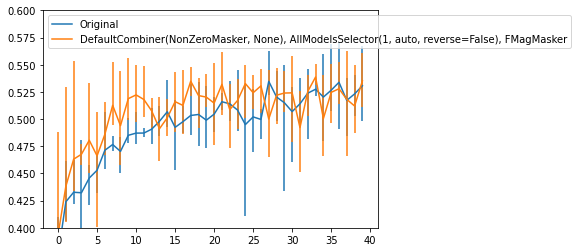

In [ ]:
for key in es.results:
  es.plot_results(ylim=[0.4, 0.6])

In [ ]:
es_max_5_2_cutoff = ExperimentSearch(keras.models.load_model("cifar_before_training_maskingsgd.h5", custom_objects={"MaskingSGD": MaskingSGD}),
                      MaskingSGD(),
                      sparse_categorical_crossentropy,
                      ['sparse_categorical_accuracy'],
                      [MaxMagCombiner(), MaxMagCombiner(FMagMasker, 79)],
                      [AnyDifferenceSelector(5, 2), AnyDifferenceSelector(10, 4)],
                      [FMagMasker],
                      5,
                      percentage,
                      "cifar10")

es_max_5_2_cutoff.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), epochs=epochs, test_data=(test_images, test_labels))

25
cifar10 models/cifar10\39
cifar10 models/cifar10\22
cifar10 models/cifar10\1
cifar10 models/cifar10\27
cifar10 models/cifar10\38
cifar10 models/cifar10\13
cifar10 models/cifar10\6
cifar10 models/cifar10\3
cifar10 models/cifar10\20
cifar10 models/cifar10\25
cifar10 models/cifar10\0
cifar10 models/cifar10\33
cifar10 models/cifar10\12
cifar10 models/cifar10\17
cifar10 models/cifar10\10
cifar10 models/cifar10\45
cifar10 models/cifar10\11
cifar10 models/cifar10\48
cifar10 models/cifar10\14
cifar10 models/cifar10\5
cifar10 models/cifar10\16
cifar10 models/cifar10\29
cifar10 models/cifar10\9
cifar10 models/cifar10\2
cifar10 models/cifar10\41
50
25
cifar10 models/cifar10\49
cifar10 models/cifar10\46
cifar10 models/cifar10\32
cifar10 models/cifar10\28
cifar10 models/cifar10\20
cifar10 models/cifar10\42
cifar10 models/cifar10\17
cifar10 models/cifar10\19
cifar10 models/cifar10\39
cifar10 models/cifar10\45
cifar10 models/cifar10\5
cifar10 models/cifar10\33
cifar10 models/cifar10\30
cifar10 mod

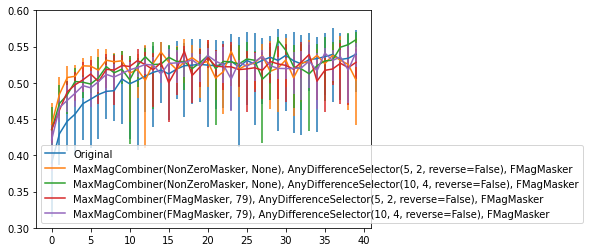

In [ ]:
es_max_5_2_cutoff.plot_results(ylim=[0.3, 0.6], loc='lower left')

In [ ]:
es_def_max_avg = ExperimentSearch(keras.models.load_model("cifar_before_training_maskingsgd.h5", custom_objects={"MaskingSGD": MaskingSGD}),
                      MaskingSGD(),
                      sparse_categorical_crossentropy,
                      ['sparse_categorical_accuracy'],
                      [DefaultCombiner(), MaxMagCombiner(), AvgCombiner()],
                      [AnyDifferenceSelector(10, 4)],
                      [FMagMasker],
                      5,
                      percentage,
                      "cifar10")
es_def_max_avg.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), epochs=epochs, test_data=(test_images, test_labels))

50
50
50


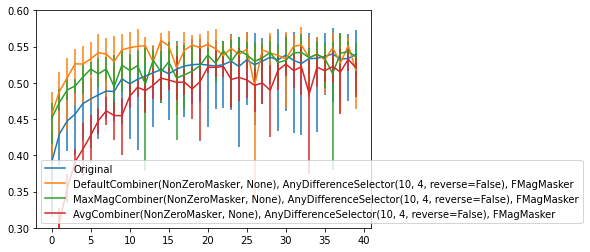

In [ ]:
es_def_max_avg.plot_results(ylim=[0.3, 0.6], loc='best')

In [19]:
class CheckSelectorCallback(LotteryCallback):
  def on_lottery_start(self, lt, current_model):
    print("-----------------------------------")
    print("Lottery:", lt.combiner, lt.selector)


  def on_marry_end(self, lt, current_model):
    weights_0_percentage(current_model)

In [ ]:
es_max_selector_compare = ExperimentSearch(keras.models.load_model("cifar_before_training_maskingsgd.h5", custom_objects={"MaskingSGD": MaskingSGD}),
                      MaskingSGD(),
                      sparse_categorical_crossentropy,
                      ['sparse_categorical_accuracy'],
                      [MaxMagCombiner(), AvgCombiner()],
                      [AnyDifferenceSelector(10, 4), AnyDifferenceSelector(10, 4, True)],
                      [FMagMasker],
                      5,
                      percentage,
                      "cifar10",
                      callbacks=[CheckSelectorCallback()])
es_max_selector_compare.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), epochs=epochs, test_data=(test_images, test_labels))

-----------------------------------
Lottery: MaxMagCombiner(NonZeroMasker, None) AnyDifferenceSelector(10, 4, reverse=False)
50
(3072, 4000)
4788200  /  12288000
0.38966471354166665
(4000, 1000)
1557536  /  4000000
0.389384
(1000, 4000)
1557368  /  4000000
0.389342
(4000, 10)
20458  /  40000
0.51145
(3072, 4000)
4785512  /  12288000
0.38944596354166666
(4000, 1000)
1557568  /  4000000
0.389392
(1000, 4000)
1557946  /  4000000
0.3894865
(4000, 10)
15619  /  40000
0.390475
(3072, 4000)
4785656  /  12288000
0.38945768229166666
(4000, 1000)
1556691  /  4000000
0.38917275
(1000, 4000)
1557712  /  4000000
0.389428
(4000, 10)
15718  /  40000
0.39295
(3072, 4000)
4790296  /  12288000
0.3898352864583333
(4000, 1000)
1559148  /  4000000
0.389787
(1000, 4000)
1558224  /  4000000
0.389556
(4000, 10)
17784  /  40000
0.4446
(3072, 4000)
4787062  /  12288000
0.3895721028645833
(4000, 1000)
1556898  /  4000000
0.3892245
(1000, 4000)
1557317  /  4000000
0.38932925
(4000, 10)
15652  /  40000
0.3913
----

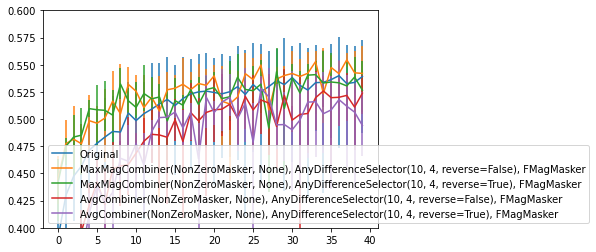

In [ ]:
es_max_selector_compare.plot_results(ylim=[0.4, 0.6], loc="lower left")

In [7]:
es_max_selector_compare_big = ExperimentSearch(keras.models.load_model("cifar_before_training_maskingsgd.h5", custom_objects={"MaskingSGD": MaskingSGD}),
                      MaskingSGD(),
                      sparse_categorical_crossentropy,
                      ['sparse_categorical_accuracy'],
                      [MaxMagCombiner()],
                      [AnyDifferenceSelector(30, 4), AnyDifferenceSelector(30, 4, True)],
                      [FMagMasker],
                      5,
                      percentage,
                      "cifar10",
                      callbacks=[CheckSelectorCallback()])
es_max_selector_compare_big.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), epochs=epochs, test_data=(test_images, test_labels))

-----------------------------------
Lottery: MaxMagCombiner(NonZeroMasker, None) AnyDifferenceSelector(30, 4, reverse=False)
90
cifar10 models/cifar10\91
cifar10 models/cifar10\145
cifar10 models/cifar10\44
cifar10 models/cifar10\113
cifar10 models/cifar10\136
cifar10 models/cifar10\126
cifar10 models/cifar10\94
cifar10 models/cifar10\135
cifar10 models/cifar10\32
cifar10 models/cifar10\26
cifar10 models/cifar10\9
cifar10 models/cifar10\62
cifar10 models/cifar10\3
cifar10 models/cifar10\20
cifar10 models/cifar10\61
cifar10 models/cifar10\45
cifar10 models/cifar10\5
cifar10 models/cifar10\115
cifar10 models/cifar10\72
cifar10 models/cifar10\30
cifar10 models/cifar10\83
cifar10 models/cifar10\103
cifar10 models/cifar10\21
cifar10 models/cifar10\109
cifar10 models/cifar10\140
cifar10 models/cifar10\87
cifar10 models/cifar10\99
cifar10 models/cifar10\147
cifar10 models/cifar10\37
cifar10 models/cifar10\81
(3072, 4000)
4760707  /  12288000
0.38742732747395836
(4000, 1000)
1548818  /  400000

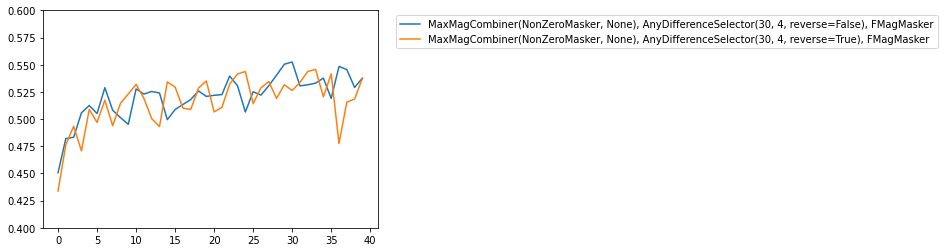

In [11]:
es_max_selector_compare_big.plot_results(ylim=[.4, .6], draw_std=False, draw_org=False, draw_indices=[0, 1])

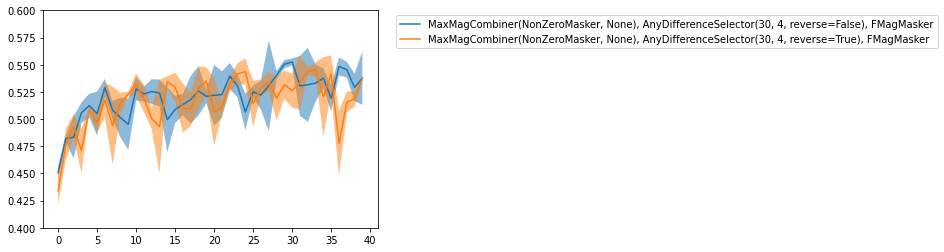

In [9]:
es_max_selector_compare_big.plot_results(ylim=[.4, .6], draw_org=False)

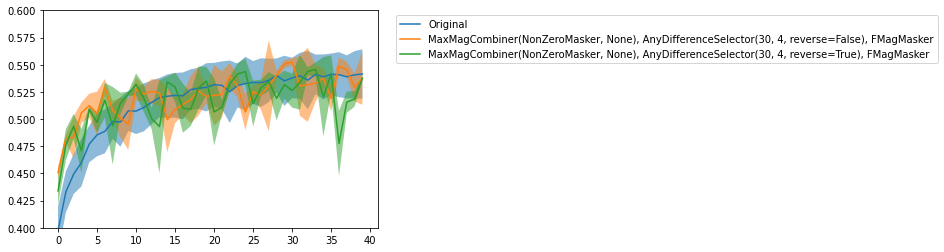

In [12]:
es_max_selector_compare_big.plot_results(ylim=[.4, .6])

In [ ]:
#draw the big one with default combiner as well

In [ ]:
es_comparers = ExperimentSearch(keras.models.load_model("cifar_before_training_maskingsgd.h5", custom_objects={"MaskingSGD": MaskingSGD}),
                      MaskingSGD(),
                      sparse_categorical_crossentropy,
                      ['sparse_categorical_accuracy'],
                      [DefaultCombiner(), MaxMagCombiner(), MaxCombiner(), MaxWithoutZeroCombiner(), AvgCombiner(), AvgNoZeroCombiner(), AddCombiner()],
                      [AnyDifferenceSelector(10, 4)],
                      [FMagMasker],
                      5,
                      percentage,
                      "cifar10",
                      callbacks=[CheckSelectorCallback()])
es_comparers.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), epochs=epochs, test_data=(test_images, test_labels))

-----------------------------------
Lottery: DefaultCombiner(NonZeroMasker, None) AnyDifferenceSelector(10, 4, reverse=False)
50
cifar10 models/cifar10\84
cifar10 models/cifar10\132
cifar10 models/cifar10\149
cifar10 models/cifar10\39
cifar10 models/cifar10\100
cifar10 models/cifar10\9
cifar10 models/cifar10\111
cifar10 models/cifar10\42
cifar10 models/cifar10\115
cifar10 models/cifar10\130
(3072, 4000)
9707520  /  12288000
0.79
(4000, 1000)
3160000  /  4000000
0.79
(1000, 4000)
3160000  /  4000000
0.79
(4000, 10)
31600  /  40000
0.79
cifar10 models/cifar10\78
cifar10 models/cifar10\1
cifar10 models/cifar10\146
cifar10 models/cifar10\112
cifar10 models/cifar10\50
cifar10 models/cifar10\72
cifar10 models/cifar10\26
cifar10 models/cifar10\24
cifar10 models/cifar10\79
cifar10 models/cifar10\33
(3072, 4000)
9707522  /  12288000
0.7900001627604166
(4000, 1000)
3160000  /  4000000
0.79
(1000, 4000)
3160000  /  4000000
0.79
(4000, 10)
31600  /  40000
0.79
cifar10 models/cifar10\4
cifar10 mode

D:\Users\nicol\Documents\Uni\Master\3rd Semester\Thesis\lottery\Combiner.py:154: RuntimeWarning: Mean of empty slice
  return np.nanmean(weight_array, axis=0)


(3072, 4000)
0  /  12288000
0.0
(4000, 1000)
0  /  4000000
0.0
(1000, 4000)
0  /  4000000
0.0
(4000, 10)
0  /  40000
0.0
cifar10 models/cifar10\50
cifar10 models/cifar10\82
cifar10 models/cifar10\73
cifar10 models/cifar10\118
cifar10 models/cifar10\64
cifar10 models/cifar10\2
cifar10 models/cifar10\43
cifar10 models/cifar10\20
cifar10 models/cifar10\35
cifar10 models/cifar10\51
(3072, 4000)
0  /  12288000
0.0
(4000, 1000)
0  /  4000000
0.0
(1000, 4000)
0  /  4000000
0.0
(4000, 10)
0  /  40000
0.0
cifar10 models/cifar10\80
cifar10 models/cifar10\99
cifar10 models/cifar10\116
cifar10 models/cifar10\90
cifar10 models/cifar10\141
cifar10 models/cifar10\101
cifar10 models/cifar10\124
cifar10 models/cifar10\27
cifar10 models/cifar10\65
cifar10 models/cifar10\29
(3072, 4000)
1  /  12288000
8.138020833333333e-08
(4000, 1000)
0  /  4000000
0.0
(1000, 4000)
0  /  4000000
0.0
(4000, 10)
0  /  40000
0.0
cifar10 models/cifar10\25
cifar10 models/cifar10\61
cifar10 models/cifar10\115
cifar10 models/c

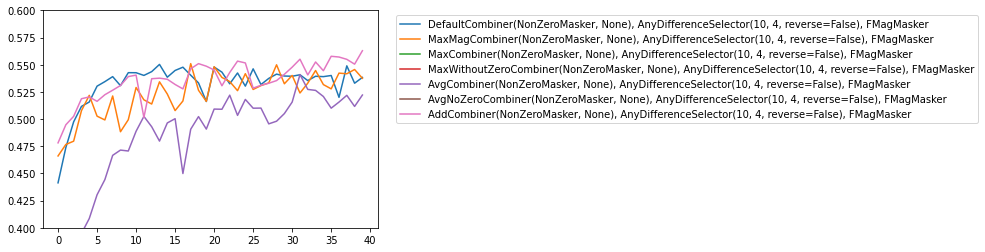

In [ ]:
es_comparers.plot_results(ylim=[0.4, .6], draw_org=False, draw_err=False)

In [ ]:
es_avg_max = ExperimentSearch(keras.models.load_model("cifar_before_training_maskingsgd.h5", custom_objects={"MaskingSGD": MaskingSGD}), 
                   MaskingSGD, 
                   sparse_categorical_crossentropy, 
                   ['sparse_categorical_accuracy'], 
                   [DefaultCombiner(), MaxWithoutZeroCombiner(), AvgNoZeroCombiner(), MinWithoutZeroCombiner()], 
                   [AnyDifferenceSelector(10, 4), AnyDifferenceSelector(10, 4, False)], [FMagMasker], 5, percentage, "cifar10")

es_avg_max.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), epochs=epochs, test_data=(test_images, test_labels))

50
cifar10 models/cifar10\16
cifar10 models/cifar10\109
cifar10 models/cifar10\14
cifar10 models/cifar10\94
cifar10 models/cifar10\113
cifar10 models/cifar10\21
cifar10 models/cifar10\56
cifar10 models/cifar10\46
cifar10 models/cifar10\39
cifar10 models/cifar10\75
cifar10 models/cifar10\85
cifar10 models/cifar10\91
cifar10 models/cifar10\72
cifar10 models/cifar10\123
cifar10 models/cifar10\43
cifar10 models/cifar10\66
cifar10 models/cifar10\134
cifar10 models/cifar10\63
cifar10 models/cifar10\99
cifar10 models/cifar10\148
cifar10 models/cifar10\67
cifar10 models/cifar10\115
cifar10 models/cifar10\20
cifar10 models/cifar10\146
cifar10 models/cifar10\65
cifar10 models/cifar10\129
cifar10 models/cifar10\81
cifar10 models/cifar10\44
cifar10 models/cifar10\45
cifar10 models/cifar10\104
cifar10 models/cifar10\147
cifar10 models/cifar10\5
cifar10 models/cifar10\112
cifar10 models/cifar10\145
cifar10 models/cifar10\142
cifar10 models/cifar10\87
cifar10 models/cifar10\30
cifar10 models/cifar10\

D:\Users\nicol\Documents\Uni\Master\3rd Semester\Thesis\lottery\Combiner.py:172: RuntimeWarning: Mean of empty slice
  return np.nan_to_num(np.nanmean(weight_array, axis=0))


cifar10 models/cifar10\105
cifar10 models/cifar10\1
cifar10 models/cifar10\36
cifar10 models/cifar10\118
cifar10 models/cifar10\74
cifar10 models/cifar10\32
cifar10 models/cifar10\14
cifar10 models/cifar10\34
cifar10 models/cifar10\31
cifar10 models/cifar10\47
cifar10 models/cifar10\67
cifar10 models/cifar10\141
cifar10 models/cifar10\134
cifar10 models/cifar10\70
cifar10 models/cifar10\9
cifar10 models/cifar10\56
cifar10 models/cifar10\84
cifar10 models/cifar10\103
cifar10 models/cifar10\126
cifar10 models/cifar10\58
cifar10 models/cifar10\61
cifar10 models/cifar10\0
cifar10 models/cifar10\123
cifar10 models/cifar10\18
cifar10 models/cifar10\146
cifar10 models/cifar10\24
cifar10 models/cifar10\39
cifar10 models/cifar10\100
cifar10 models/cifar10\112
cifar10 models/cifar10\21
cifar10 models/cifar10\128
cifar10 models/cifar10\95
cifar10 models/cifar10\115
cifar10 models/cifar10\63
cifar10 models/cifar10\52
cifar10 models/cifar10\7
cifar10 models/cifar10\111
cifar10 models/cifar10\127
ci

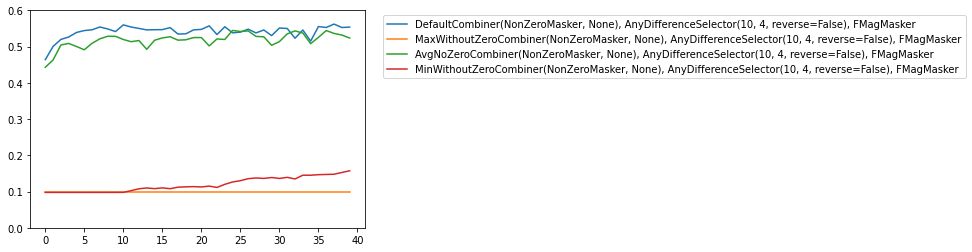

In [ ]:
es_avg_max.plot_results([0, 0.6], draw_org=False, draw_err=False)

In [ ]:
es_avg_max_min = ExperimentSearch(keras.models.load_model("cifar_before_training_maskingsgd.h5", custom_objects={"MaskingSGD": MaskingSGD}), 
                   MaskingSGD, 
                   sparse_categorical_crossentropy, 
                   ['sparse_categorical_accuracy'], 
                   [DefaultCombiner(), MaxWithoutZeroCombiner(), AvgNoZeroCombiner(), MinWithoutZeroCombiner()], 
                   [AnyDifferenceSelector(10, 4), AnyDifferenceSelector(10, 4, True)], [FMagMasker], 5, percentage, "cifar10", callbacks=[CheckSelectorCallback()])

es_avg_max_min.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), epochs=epochs, test_data=(test_images, test_labels))

-----------------------------------
Lottery: DefaultCombiner(NonZeroMasker, None) AnyDifferenceSelector(10, 4, reverse=False)
50
cifar10 models/cifar10\56
cifar10 models/cifar10\118
cifar10 models/cifar10\8
cifar10 models/cifar10\92
cifar10 models/cifar10\136
cifar10 models/cifar10\57
cifar10 models/cifar10\107
cifar10 models/cifar10\114
cifar10 models/cifar10\44
cifar10 models/cifar10\124
(3072, 4000)
9695233  /  12288000
0.7890000813802084
(4000, 1000)
3156000  /  4000000
0.789
(1000, 4000)
3156001  /  4000000
0.78900025
(4000, 10)
31560  /  40000
0.789
cifar10 models/cifar10\30
cifar10 models/cifar10\77
cifar10 models/cifar10\31
cifar10 models/cifar10\99
cifar10 models/cifar10\20
cifar10 models/cifar10\128
cifar10 models/cifar10\143
cifar10 models/cifar10\148
cifar10 models/cifar10\4
cifar10 models/cifar10\1
(3072, 4000)
9695232  /  12288000
0.789
(4000, 1000)
3156000  /  4000000
0.789
(1000, 4000)
3156001  /  4000000
0.78900025
(4000, 10)
31560  /  40000
0.789
cifar10 models/cifar1

D:\Users\nicol\Documents\Uni\Master\3rd Semester\Thesis\lottery\Combiner.py:172: RuntimeWarning: Mean of empty slice
  return np.nan_to_num(np.nanmean(weight_array, axis=0))


(3072, 4000)
4761502  /  12288000
0.38749202473958333
(4000, 1000)
1548788  /  4000000
0.387197
(1000, 4000)
1549471  /  4000000
0.38736775
(4000, 10)
15565  /  40000
0.389125
cifar10 models/cifar10\134
cifar10 models/cifar10\96
cifar10 models/cifar10\108
cifar10 models/cifar10\149
cifar10 models/cifar10\59
cifar10 models/cifar10\61
cifar10 models/cifar10\114
cifar10 models/cifar10\98
cifar10 models/cifar10\100
cifar10 models/cifar10\102
(3072, 4000)
4762124  /  12288000
0.38754264322916665
(4000, 1000)
1549622  /  4000000
0.3874055
(1000, 4000)
1549539  /  4000000
0.38738475
(4000, 10)
15600  /  40000
0.39
cifar10 models/cifar10\94
cifar10 models/cifar10\21
cifar10 models/cifar10\3
cifar10 models/cifar10\103
cifar10 models/cifar10\40
cifar10 models/cifar10\127
cifar10 models/cifar10\31
cifar10 models/cifar10\91
cifar10 models/cifar10\117
cifar10 models/cifar10\15
(3072, 4000)
4761502  /  12288000
0.38749202473958333
(4000, 1000)
1549313  /  4000000
0.38732825
(1000, 4000)
1550366  /  

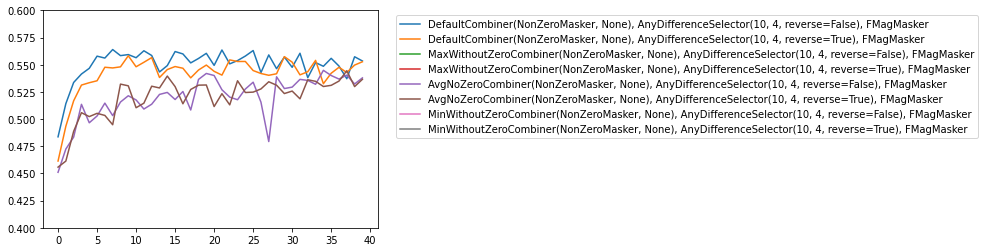

In [ ]:
es_avg_max_min.plot_results(ylim=[.4, .6], draw_org=False, draw_err=False, draw_indices=[])
# Avg Combiner gar nicht mal schlecht, besser als 100% (unpruned) network, aber schlechter als einfach nur ein auf 21% gepruntes network.
# 38%-39% 0-weights bei 4 möglichst unterschiedlichen netzwerken -> 4 mal komplett unterschieldlich würden 16% 0-weights übrig bleiben. 
# Bei reverse, 38%-49%! 0-weights -> performed aber genau so gut.

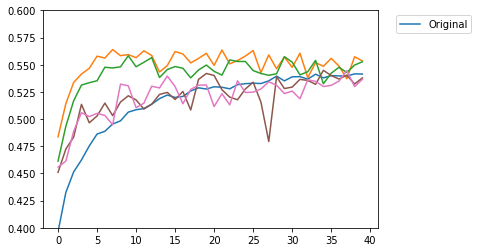

In [ ]:
es_avg_max_min.plot_results(ylim=[.4, .6], draw_org=True, draw_err=False, draw_indices=[])

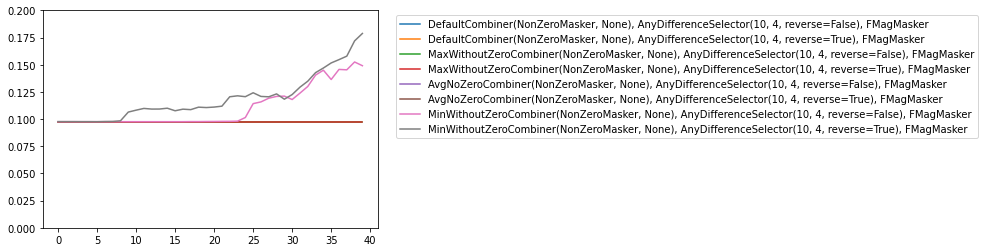

In [ ]:
es_avg_max_min.plot_results(ylim=[0, .2], draw_org=False, draw_err=False)
# Beide Max combiner super bad, beide min combiner fast genauso bad.

In [ ]:
giga_outperformance_experiment = ExperimentSearch(keras.models.load_model("cifar_before_training_maskingsgd.h5", custom_objects={"MaskingSGD": MaskingSGD}), 
                   MaskingSGD, 
                   sparse_categorical_crossentropy, 
                   ['sparse_categorical_accuracy'], 
                   [DefaultCombiner(), MaxMagCombiner(), AvgNoZeroCombiner(), AddCombiner()], 
                   [AnyDifferenceSelector(10, 4), AnyDifferenceSelector(10, 4, True)], [FMagMasker], 5, percentage, "cifar10", callbacks=[CheckSelectorCallback()])

giga_outperformance_experiment.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), epochs=epochs, test_data=(test_images, test_labels))

-----------------------------------
Lottery: DefaultCombiner(NonZeroMasker, None) AnyDifferenceSelector(10, 4, reverse=False)
50
cifar10 models/cifar10\51
cifar10 models/cifar10\123
cifar10 models/cifar10\136
cifar10 models/cifar10\79
cifar10 models/cifar10\83
cifar10 models/cifar10\1
cifar10 models/cifar10\20
cifar10 models/cifar10\137
cifar10 models/cifar10\135
cifar10 models/cifar10\108
(3072, 4000)
9695232  /  12288000
0.789
(4000, 1000)
3156000  /  4000000
0.789
(1000, 4000)
3156000  /  4000000
0.789
(4000, 10)
31560  /  40000
0.789
cifar10 models/cifar10\9
cifar10 models/cifar10\52
cifar10 models/cifar10\84
cifar10 models/cifar10\144
cifar10 models/cifar10\85
cifar10 models/cifar10\13
cifar10 models/cifar10\75
cifar10 models/cifar10\93
cifar10 models/cifar10\57
cifar10 models/cifar10\0
(3072, 4000)
9695232  /  12288000
0.789
(4000, 1000)
3156000  /  4000000
0.789
(1000, 4000)
3156000  /  4000000
0.789
(4000, 10)
31560  /  40000
0.789
cifar10 models/cifar10\114
cifar10 models/cifa

D:\Users\nicol\Documents\Uni\Master\3rd Semester\Thesis\lottery\Combiner.py:172: RuntimeWarning: Mean of empty slice
  return np.nan_to_num(np.nanmean(weight_array, axis=0))


(3072, 4000)
4761705  /  12288000
0.387508544921875
(4000, 1000)
1549625  /  4000000
0.38740625
(1000, 4000)
1549819  /  4000000
0.38745475
(4000, 10)
15561  /  40000
0.389025
cifar10 models/cifar10\125
cifar10 models/cifar10\46
cifar10 models/cifar10\44
cifar10 models/cifar10\107
cifar10 models/cifar10\69
cifar10 models/cifar10\142
cifar10 models/cifar10\73
cifar10 models/cifar10\37
cifar10 models/cifar10\139
cifar10 models/cifar10\17
(3072, 4000)
4762000  /  12288000
0.3875325520833333
(4000, 1000)
1550328  /  4000000
0.387582
(1000, 4000)
1549349  /  4000000
0.38733725
(4000, 10)
15594  /  40000
0.38985
cifar10 models/cifar10\108
cifar10 models/cifar10\6
cifar10 models/cifar10\116
cifar10 models/cifar10\149
cifar10 models/cifar10\96
cifar10 models/cifar10\61
cifar10 models/cifar10\85
cifar10 models/cifar10\3
cifar10 models/cifar10\104
cifar10 models/cifar10\75
(3072, 4000)
4762337  /  12288000
0.3875599772135417
(4000, 1000)
1548897  /  4000000
0.38722425
(1000, 4000)
1550124  /  40

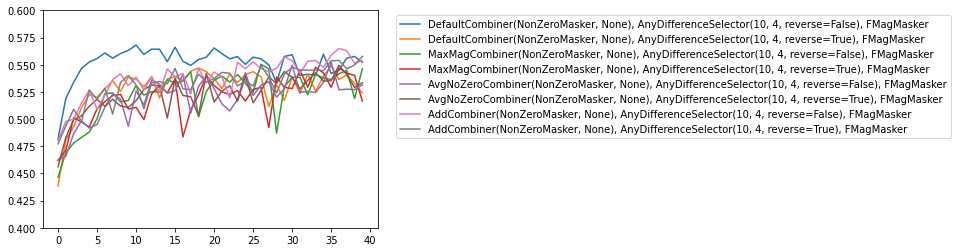

In [ ]:
giga_outperformance_experiment.plot_results(ylim=[0.4, 0.6], draw_org=False, draw_err=False, draw_indices=[0, 1, 2, 3, 4, 5, 6, 7])

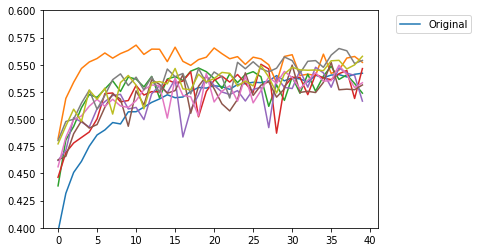

In [ ]:
giga_outperformance_experiment.plot_results(ylim=[0.4, 0.6], draw_org=True, draw_err=False, draw_indices=[0, 1, 2, 3, 4, 5, 6, 7])

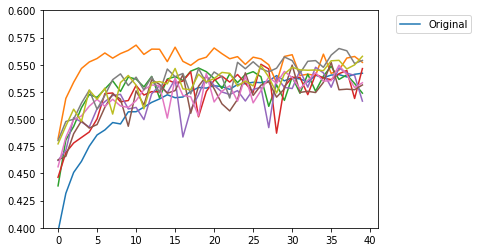

In [ ]:
giga_outperformance_experiment.plot_results(ylim=[0.4, .6], draw_org=True, draw_err=False, draw_indices=[0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
giga_outperformance_add_smaller_selector = ExperimentSearch(keras.models.load_model("cifar_before_training_maskingsgd.h5", custom_objects={"MaskingSGD": MaskingSGD}), 
                   MaskingSGD, 
                   sparse_categorical_crossentropy, 
                   ['sparse_categorical_accuracy'], 
                   [DefaultCombiner(), MaxMagCombiner(), AvgNoZeroCombiner(), AddCombiner()], 
                   [AnyDifferenceSelector(10, 4), AnyDifferenceSelector(10, 4, True), AnyDifferenceSelector(5, 2), AnyDifferenceSelector(5, 2, True)], [FMagMasker], 5, percentage, "cifar10", callbacks=[CheckSelectorCallback()])

giga_outperformance_add_smaller_selector.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), epochs=epochs, test_data=(test_images, test_labels))

-----------------------------------
Lottery: DefaultCombiner(NonZeroMasker, None) AnyDifferenceSelector(10, 4, reverse=False)
50
cifar10 models/cifar10\91
cifar10 models/cifar10\115
cifar10 models/cifar10\138
cifar10 models/cifar10\52
cifar10 models/cifar10\129
cifar10 models/cifar10\19
cifar10 models/cifar10\100
cifar10 models/cifar10\55
cifar10 models/cifar10\72
cifar10 models/cifar10\99
(3072, 4000)
9695233  /  12288000
0.7890000813802084
(4000, 1000)
3156000  /  4000000
0.789
(1000, 4000)
3156000  /  4000000
0.789
(4000, 10)
31560  /  40000
0.789
cifar10 models/cifar10\17
cifar10 models/cifar10\43
cifar10 models/cifar10\104
cifar10 models/cifar10\121
cifar10 models/cifar10\94
cifar10 models/cifar10\28
cifar10 models/cifar10\95
cifar10 models/cifar10\96
cifar10 models/cifar10\12
cifar10 models/cifar10\18
(3072, 4000)
9695232  /  12288000
0.789
(4000, 1000)
3156000  /  4000000
0.789
(1000, 4000)
3156000  /  4000000
0.789
(4000, 10)
31560  /  40000
0.789
cifar10 models/cifar10\37
cifa

D:\Users\nicol\Documents\Uni\Master\3rd Semester\Thesis\lottery\Combiner.py:172: RuntimeWarning: Mean of empty slice
  return np.nan_to_num(np.nanmean(weight_array, axis=0))


(3072, 4000)
4761855  /  12288000
0.387520751953125
(4000, 1000)
1549595  /  4000000
0.38739875
(1000, 4000)
1549545  /  4000000
0.38738625
(4000, 10)
15562  /  40000
0.38905
cifar10 models/cifar10\43
cifar10 models/cifar10\19
cifar10 models/cifar10\104
cifar10 models/cifar10\145
cifar10 models/cifar10\56
cifar10 models/cifar10\129
cifar10 models/cifar10\73
cifar10 models/cifar10\61
cifar10 models/cifar10\37
cifar10 models/cifar10\4
(3072, 4000)
4761945  /  12288000
0.387528076171875
(4000, 1000)
1549399  /  4000000
0.38734975
(1000, 4000)
1548840  /  4000000
0.38721
(4000, 10)
15585  /  40000
0.389625
cifar10 models/cifar10\34
cifar10 models/cifar10\98
cifar10 models/cifar10\117
cifar10 models/cifar10\119
cifar10 models/cifar10\133
cifar10 models/cifar10\124
cifar10 models/cifar10\136
cifar10 models/cifar10\35
cifar10 models/cifar10\148
cifar10 models/cifar10\2
(3072, 4000)
4762741  /  12288000
0.38759285481770833
(4000, 1000)
1549931  /  4000000
0.38748275
(1000, 4000)
1549533  /  40

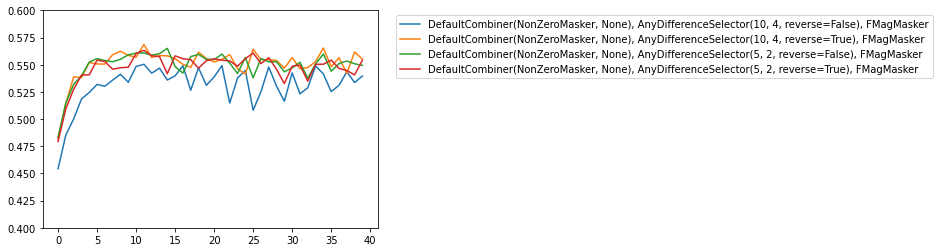

In [ ]:
giga_outperformance_add_smaller_selector.plot_results(ylim=[.4, .6], draw_org=False, draw_err=False, draw_indices=[0, 1, 2, 3])

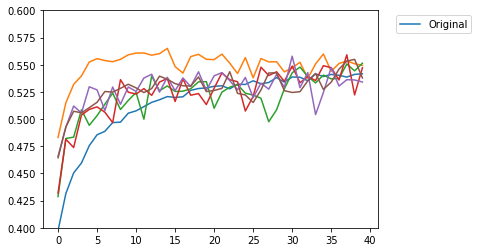

In [ ]:
giga_outperformance_add_smaller_selector.plot_results(ylim=[.4, .6], draw_org=True, draw_err=False, draw_indices=[2, 4, 5, 6, 7])

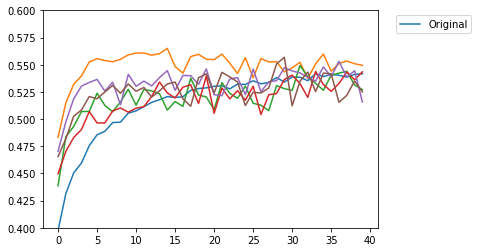

In [ ]:
giga_outperformance_add_smaller_selector.plot_results(ylim=[.4, .6], draw_org=True, draw_err=False, draw_indices=[2, 8, 9, 10, 11])

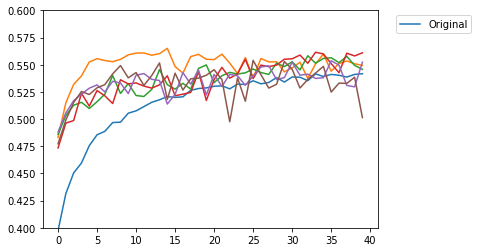

In [ ]:
giga_outperformance_add_smaller_selector.plot_results(ylim=[.4, .6], draw_org=True, draw_err=False, draw_indices=[2, 12, 13, 14, 15])

In [ ]:
untrained = []
trained = []

class ModelCallback(LotteryCallback):
  def on_marry_end(self, lt, current_model):
    untrained.append(current_model.model.get_weights())

  def on_retrain_end(self, lt, current_model):
    trained.append(current_model.model.get_weights())

  def on_select_start(self, lt, current_model):
    print(current_model)

  def on_select_end(self, lt, current_model):
    print(current_model)

es_max_zero = ExperimentSearch(keras.models.load_model("cifar_before_training_maskingsgd.h5", custom_objects={"MaskingSGD": MaskingSGD}), 
                   MaskingSGD, 
                   sparse_categorical_crossentropy, 
                   ['sparse_categorical_accuracy'], 
                   [MaxWithoutZeroCombiner()], 
                   [AnyDifferenceSelector(5, 2)], [FMagMasker], 2, percentage, "cifar10", callbacks=[ModelCallback()])

es_max_zero.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), epochs=epochs, test_data=(test_images, test_labels))

10
cifar10 models/cifar10\106
cifar10 models/cifar10\94
cifar10 models/cifar10\72
cifar10 models/cifar10\31
cifar10 models/cifar10\56
[<lottery.Models.ModelWrapper object at 0x0000028D8C47C730>, <lottery.Models.ModelWrapper object at 0x0000028D69364460>, <lottery.Models.ModelWrapper object at 0x0000028D6D983730>, <lottery.Models.ModelWrapper object at 0x0000028D678A7A60>, <lottery.Models.ModelWrapper object at 0x0000028D6C885280>]
[<lottery.Models.ModelWrapper object at 0x0000028D8C47C730>, <lottery.Models.ModelWrapper object at 0x0000028D6C885280>]
cifar10 models/cifar10\33
cifar10 models/cifar10\5
cifar10 models/cifar10\10
cifar10 models/cifar10\88
cifar10 models/cifar10\92
[<lottery.Models.ModelWrapper object at 0x0000028D8C4A3A30>, <lottery.Models.ModelWrapper object at 0x0000028DEC3E59A0>, <lottery.Models.ModelWrapper object at 0x0000028DEC3CE610>, <lottery.Models.ModelWrapper object at 0x0000028D747411C0>, <lottery.Models.ModelWrapper object at 0x0000028D73E52A30>]
[<lottery.Mode

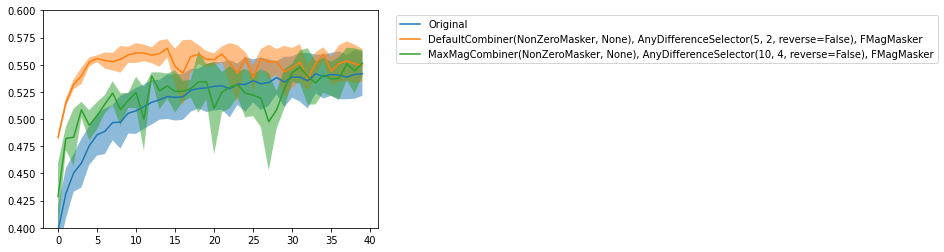

In [ ]:
plot_stuff(giga_outperformance_add_smaller_selector, ylim=[0.4, 0.6], draw_org=True, draw_indices=[2, 4])

In [ ]:
es = ExperimentSearch(keras.models.load_model("cifar_before_training_maskingsgd.h5", custom_objects={"MaskingSGD": MaskingSGD}), 
                   MaskingSGD, 
                   sparse_categorical_crossentropy, 
                   ['sparse_categorical_accuracy'], 
                   [DefaultCombiner(), MaxMagCombiner(), AvgNoZeroCombiner(), MinWithoutZeroCombiner(), MaxWithoutZeroCombiner(), AddCombiner()], 
                   [AnyDifferenceSelector(10, 4)],
                   [FMagMasker], 5, percentage, "cifar10", callbacks=[CheckSelectorCallback()])

es.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), epochs=epochs, test_data=(test_images, test_labels))

-----------------------------------
Lottery: MinWithoutZeroCombiner(NonZeroMasker, None) AnyDifferenceSelector(10, 4, reverse=False)
50
cifar10 models/cifar10\141
cifar10 models/cifar10\131
cifar10 models/cifar10\136
cifar10 models/cifar10\121
cifar10 models/cifar10\40
cifar10 models/cifar10\69
cifar10 models/cifar10\135
cifar10 models/cifar10\133
cifar10 models/cifar10\119
cifar10 models/cifar10\24
(3072, 4000)
4760714  /  12288000
0.38742789713541664
(4000, 1000)
1549355  /  4000000
0.38733875
(1000, 4000)
1550188  /  4000000
0.387547
(4000, 10)
15496  /  40000
0.3874
cifar10 models/cifar10\128
cifar10 models/cifar10\84
cifar10 models/cifar10\39
cifar10 models/cifar10\19
cifar10 models/cifar10\56
cifar10 models/cifar10\76
cifar10 models/cifar10\15
cifar10 models/cifar10\90
cifar10 models/cifar10\114
cifar10 models/cifar10\13
(3072, 4000)
4761437  /  12288000
0.38748673502604164
(4000, 1000)
1550702  /  4000000
0.3876755
(1000, 4000)
1549339  /  4000000
0.38733475
(4000, 10)
15559  / 

ValueError: ignored

In [ ]:
lt = LotteryTicket(keras.models.load_model("cifar_before_training_maskingsgd.h5", custom_objects={"MaskingSGD": MaskingSGD}),
                   MaskingSGD, sparse_categorical_crossentropy, ['sparse_categorical_accuracy'], combiner=DefaultCombiner(), iterations=5, name="cifar10", callbacks=[CheckSelectorCallback()])
lt.set_pruner(FMagMasker)
lt.set_pruning_percentage(40)
lt.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), epochs=40, test_data=(test_images, test_labels))

es.results[(lt.combiner, lt.selector, lt.pruner)] = lt.hist_experiment

-----------------------------------
Lottery: DefaultCombiner(NonZeroMasker, None) AllModelsSelector(1, auto, reverse=False)
5
cifar10 models/cifar10\68
(3072, 4000)
4915200  /  12288000
0.4
(4000, 1000)
1600000  /  4000000
0.4
(1000, 4000)
1600000  /  4000000
0.4
(4000, 10)
16000  /  40000
0.4
cifar10 models/cifar10\10
(3072, 4000)
4915200  /  12288000
0.4
(4000, 1000)
1600001  /  4000000
0.40000025
(1000, 4000)
1600000  /  4000000
0.4
(4000, 10)
16000  /  40000
0.4
cifar10 models/cifar10\84
(3072, 4000)
4915200  /  12288000
0.4
(4000, 1000)
1600000  /  4000000
0.4
(1000, 4000)
1600000  /  4000000
0.4
(4000, 10)
16000  /  40000
0.4
cifar10 models/cifar10\100
(3072, 4000)
4915202  /  12288000
0.40000016276041667
(4000, 1000)
1600000  /  4000000
0.4
(1000, 4000)
1600000  /  4000000
0.4
(4000, 10)
16000  /  40000
0.4
cifar10 models/cifar10\36
(3072, 4000)
4915201  /  12288000
0.4000000813802083
(4000, 1000)
1600000  /  4000000
0.4
(1000, 4000)
1600000  /  4000000
0.4
(4000, 10)
16000  /  

AttributeError: ignored

In [ ]:
es_max_mag = ExperimentSearch(keras.models.load_model("cifar_before_training_maskingsgd.h5", custom_objects={"MaskingSGD": MaskingSGD}), 
                   MaskingSGD, 
                   sparse_categorical_crossentropy, 
                   ['sparse_categorical_accuracy'], 
                   [MaxMagCombiner(), MaxMagCombiner(FMagMasker, 79)], 
                   [AnyDifferenceSelector(5, 2), AnyDifferenceSelector(10, 2)],
                   [FMagMasker], 5, percentage, "cifar10", callbacks=[CheckSelectorCallback()])

es_max_mag.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), epochs=epochs, test_data=(test_images, test_labels))

lt = LotteryTicket(keras.models.load_model("cifar_before_training_maskingsgd.h5", custom_objects={"MaskingSGD": MaskingSGD}),
                   MaskingSGD, sparse_categorical_crossentropy, ['sparse_categorical_accuracy'], combiner=MaxMagCombiner(FMagMasker, 79), 
                   selector=AnyDifferenceSelector(10, 4),
                   iterations=5, name="cifar10", callbacks=[CheckSelectorCallback()])
lt.set_pruner(FMagMasker)
lt.set_pruning_percentage(percentage)
lt.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), epochs=40, test_data=(test_images, test_labels))
es_max_mag.results[(lt.combiner, lt.selector, lt.pruner)] = lt.hist_experiment

keys = list(es.results.keys())
#maxmag 10 4
k = keys[1]
es_max_mag.results[k] = es.results.get(k)

#default
k = keys[0]
es_max_mag.results[k] = es.results.get(k)

-----------------------------------
Lottery: MaxMagCombiner(NonZeroMasker, None) AnyDifferenceSelector(5, 2, reverse=False)
25
cifar10 models/cifar10\65
cifar10 models/cifar10\111
cifar10 models/cifar10\101
cifar10 models/cifar10\98
cifar10 models/cifar10\16
(3072, 4000)
7650112  /  12288000
0.6225677083333333
(4000, 1000)
2489834  /  4000000
0.6224585
(1000, 4000)
2489765  /  4000000
0.62244125
(4000, 10)
24938  /  40000
0.62345
cifar10 models/cifar10\104
cifar10 models/cifar10\82
cifar10 models/cifar10\85
cifar10 models/cifar10\131
cifar10 models/cifar10\72
(3072, 4000)
7649059  /  12288000
0.6224820149739584
(4000, 1000)
2489950  /  4000000
0.6224875
(1000, 4000)
2489745  /  4000000
0.62243625
(4000, 10)
24897  /  40000
0.622425
cifar10 models/cifar10\18
cifar10 models/cifar10\32
cifar10 models/cifar10\135
cifar10 models/cifar10\123
cifar10 models/cifar10\2
(3072, 4000)
7648306  /  12288000
0.6224207356770833
(4000, 1000)
2489876  /  4000000
0.622469
(1000, 4000)
2490362  /  4000000

In [ ]:
es_modular = ExperimentSearch(keras.models.load_model("cifar_before_training_maskingsgd.h5", custom_objects={"MaskingSGD": MaskingSGD}),
                      MaskingSGD(),
                      sparse_categorical_crossentropy,
                      ['sparse_categorical_accuracy'],
                      [MaxMagCombiner(), AvgNoZeroCombiner(), AddCombiner()],
                      [AnyDifferenceSelector(15, 5)],
                      [FMagMasker],
                      5,
                      95, "cifar10", callbacks=[CheckSelectorCallback()])

es_modular.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), epochs=epochs, test_data=(test_images, test_labels))

es_modular.results[k] = es.results.get(k)

-----------------------------------
Lottery: MaxMagCombiner(NonZeroMasker, None) AnyDifferenceSelector(15, 5, reverse=False)
75
cifar10 models/cifar10\84
cifar10 models/cifar10\142
cifar10 models/cifar10\25
cifar10 models/cifar10\33
cifar10 models/cifar10\53
cifar10 models/cifar10\132
cifar10 models/cifar10\93
cifar10 models/cifar10\22
cifar10 models/cifar10\69
cifar10 models/cifar10\99
cifar10 models/cifar10\149
cifar10 models/cifar10\77
cifar10 models/cifar10\67
cifar10 models/cifar10\63
cifar10 models/cifar10\64
(3072, 4000)
9514400  /  12288000
0.7742838541666667
(4000, 1000)
3094815  /  4000000
0.77370375
(1000, 4000)
3094952  /  4000000
0.773738
(4000, 10)
31019  /  40000
0.775475
cifar10 models/cifar10\118
cifar10 models/cifar10\102
cifar10 models/cifar10\86
cifar10 models/cifar10\17
cifar10 models/cifar10\100
cifar10 models/cifar10\52
cifar10 models/cifar10\1
cifar10 models/cifar10\42
cifar10 models/cifar10\3
cifar10 models/cifar10\109
cifar10 models/cifar10\59
cifar10 models/c

D:\Users\nicol\Documents\Uni\Master\3rd Semester\Thesis\lottery\Combiner.py:170: RuntimeWarning: Mean of empty slice
  return np.nan_to_num(np.nanmean(weight_array, axis=0))


(3072, 4000)
9513929  /  12288000
0.7742455240885416
(4000, 1000)
3094718  /  4000000
0.7736795
(1000, 4000)
3094824  /  4000000
0.773706
(4000, 10)
30927  /  40000
0.773175
cifar10 models/cifar10\140
cifar10 models/cifar10\108
cifar10 models/cifar10\4
cifar10 models/cifar10\46
cifar10 models/cifar10\12
cifar10 models/cifar10\89
cifar10 models/cifar10\112
cifar10 models/cifar10\133
cifar10 models/cifar10\128
cifar10 models/cifar10\118
cifar10 models/cifar10\70
cifar10 models/cifar10\102
cifar10 models/cifar10\38
cifar10 models/cifar10\129
cifar10 models/cifar10\22
(3072, 4000)
9511272  /  12288000
0.774029296875
(4000, 1000)
3094767  /  4000000
0.77369175
(1000, 4000)
3094794  /  4000000
0.7736985
(4000, 10)
30950  /  40000
0.77375
cifar10 models/cifar10\87
cifar10 models/cifar10\53
cifar10 models/cifar10\119
cifar10 models/cifar10\93
cifar10 models/cifar10\30
cifar10 models/cifar10\27
cifar10 models/cifar10\64
cifar10 models/cifar10\74
cifar10 models/cifar10\110
cifar10 models/cifar10

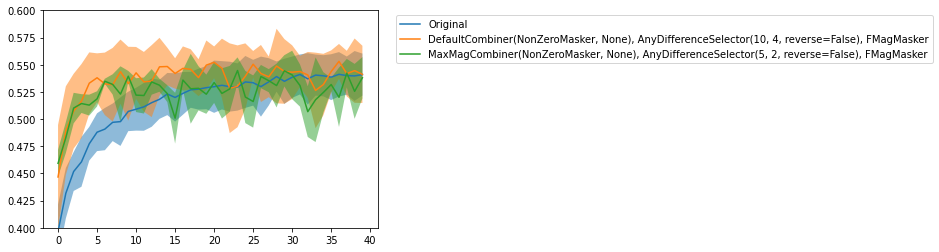

In [ ]:
es_max_mag.plot_results(ylim=[.4, .6], draw_indices=[6, 0])

In [ ]:
es_max_mag.plot_results(ylim=[.4, .6], draw_indices=[6, 5])

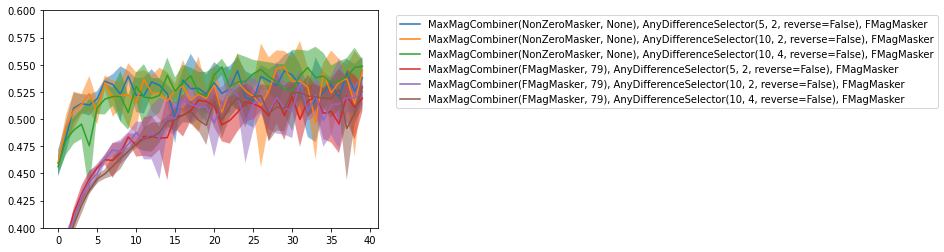

In [ ]:
es_max_mag.plot_results(ylim=[.4, .6], draw_org=False, draw_indices=[0, 1, 5, 2, 3, 4])

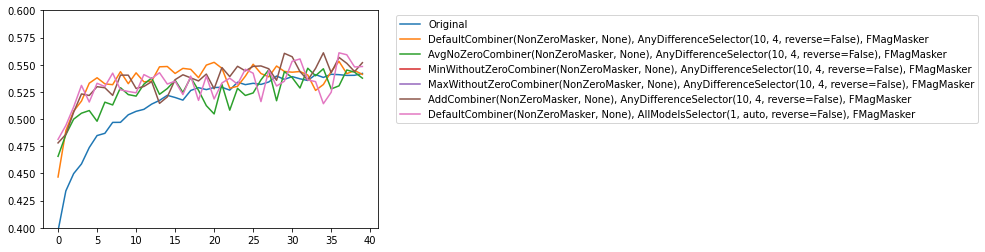

In [ ]:
es.plot_results(ylim=[.4, .6], draw_std=False, draw_indices=[0, 2, 3, 4, 5, 6])

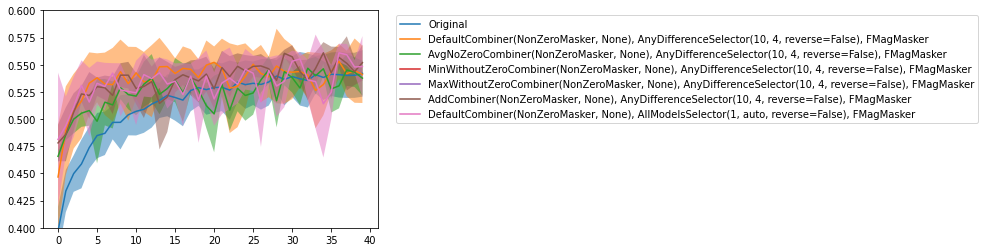

In [ ]:
es.plot_results(ylim=[.4, .6], draw_indices=[0, 2, 3, 4, 5, 6])

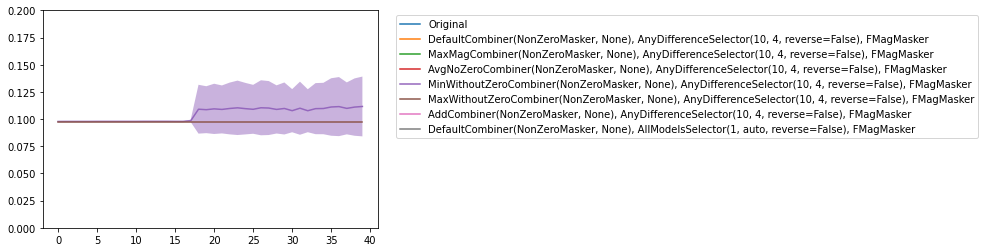

In [ ]:
es.plot_results(ylim=[0, 0.2])

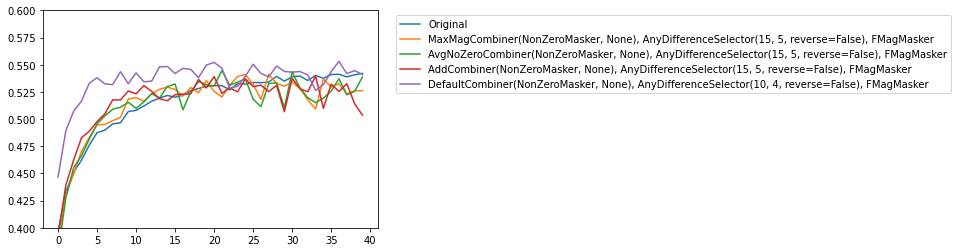

In [ ]:
es_modular.plot_results(ylim=[.4, .6], draw_std=False)

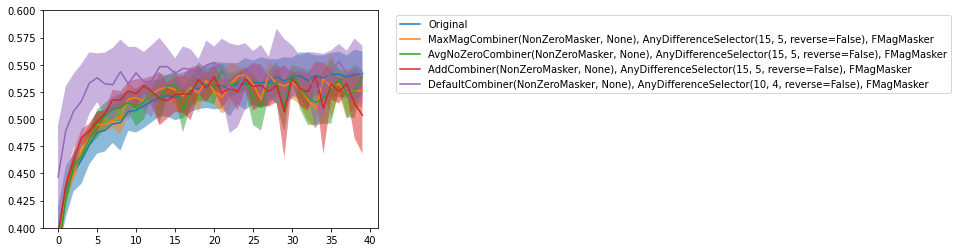

In [ ]:
es_modular.plot_results(ylim=[.4, .6])

In [21]:
es_max_mag_only = ExperimentSearch(keras.models.load_model("cifar_before_training_maskingsgd.h5", custom_objects={"MaskingSGD": MaskingSGD}),
                      MaskingSGD(),
                      sparse_categorical_crossentropy,
                      ['sparse_categorical_accuracy'],
                      [MaxMagCombiner()],
                      [AnyDifferenceSelector(5, 2), AnyDifferenceSelector(10, 4)],
                      [FMagMasker],
                      5,
                      percentage, "cifar10", callbacks=[CheckSelectorCallback()])

es_max_mag_only.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), epochs=epochs, test_data=(test_images, test_labels))


-----------------------------------
Lottery: MaxMagCombiner(NonZeroMasker, None) AnyDifferenceSelector(5, 2, reverse=False)
25
cifar10 models/cifar10\92
cifar10 models/cifar10\148
cifar10 models/cifar10\71
cifar10 models/cifar10\91
cifar10 models/cifar10\136
(3072, 4000)
7649198  /  12288000
0.6224933268229167
(4000, 1000)
2489676  /  4000000
0.622419
(1000, 4000)
2489924  /  4000000
0.622481
(4000, 10)
24911  /  40000
0.622775
cifar10 models/cifar10\120
cifar10 models/cifar10\20
cifar10 models/cifar10\51
cifar10 models/cifar10\122
cifar10 models/cifar10\86
(3072, 4000)
7649471  /  12288000
0.6225155436197917
(4000, 1000)
2489487  /  4000000
0.62237175
(1000, 4000)
2490273  /  4000000
0.62256825
(4000, 10)
24878  /  40000
0.62195
cifar10 models/cifar10\68
cifar10 models/cifar10\107
cifar10 models/cifar10\4
cifar10 models/cifar10\70
cifar10 models/cifar10\95
(3072, 4000)
7648512  /  12288000
0.6224375
(4000, 1000)
2490094  /  4000000
0.6225235
(1000, 4000)
2489878  /  4000000
0.6224695


In [23]:
lt = LotteryTicket(keras.models.load_model("cifar_before_training_maskingsgd.h5", custom_objects={"MaskingSGD": MaskingSGD}),
                   MaskingSGD, sparse_categorical_crossentropy, ['sparse_categorical_accuracy'], combiner=DefaultCombiner(), iterations=5, name="cifar10", callbacks=[CheckSelectorCallback()])
lt.set_pruner(FMagMasker)
lt.set_pruning_percentage(percentage)
lt.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), epochs=40, test_data=(test_images, test_labels))

es_max_mag_only.results[(lt.combiner, lt.selector, lt.pruner)] = lt.hist_experiment

-----------------------------------
Lottery: DefaultCombiner(NonZeroMasker, None) AllModelsSelector(1, auto, reverse=False)
5
cifar10 models/cifar10\138
(3072, 4000)
9695233  /  12288000
0.7890000813802084
(4000, 1000)
3156000  /  4000000
0.789
(1000, 4000)
3156000  /  4000000
0.789
(4000, 10)
31560  /  40000
0.789
cifar10 models/cifar10\95
(3072, 4000)
9695235  /  12288000
0.789000244140625
(4000, 1000)
3156000  /  4000000
0.789
(1000, 4000)
3156001  /  4000000
0.78900025
(4000, 10)
31560  /  40000
0.789
cifar10 models/cifar10\26
(3072, 4000)
9695232  /  12288000
0.789
(4000, 1000)
3156000  /  4000000
0.789
(1000, 4000)
3156000  /  4000000
0.789
(4000, 10)
31560  /  40000
0.789
cifar10 models/cifar10\20
(3072, 4000)
9695232  /  12288000
0.789
(4000, 1000)
3156000  /  4000000
0.789
(1000, 4000)
3156000  /  4000000
0.789
(4000, 10)
31560  /  40000
0.789
cifar10 models/cifar10\58
(3072, 4000)
9695232  /  12288000
0.789
(4000, 1000)
3156000  /  4000000
0.789
(1000, 4000)
3156001  /  40000

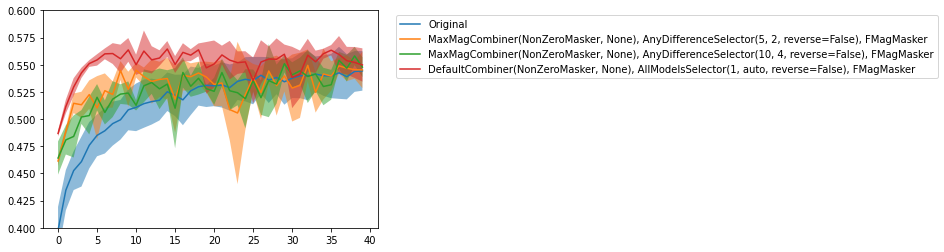

In [27]:
es_max_mag_only.plot_results(ylim=[.4, .6])

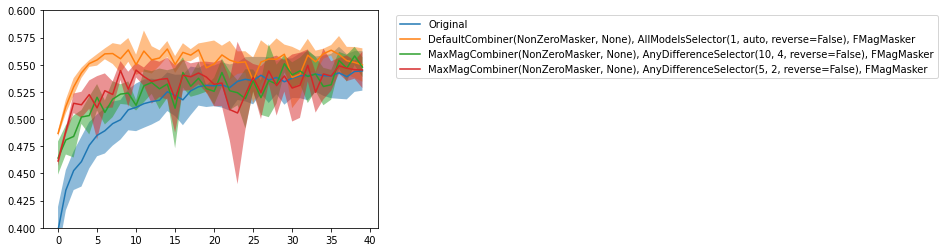

In [24]:
es_max_mag_only.plot_results(ylim=[.4, .6], draw_indices=[2, 1, 0])

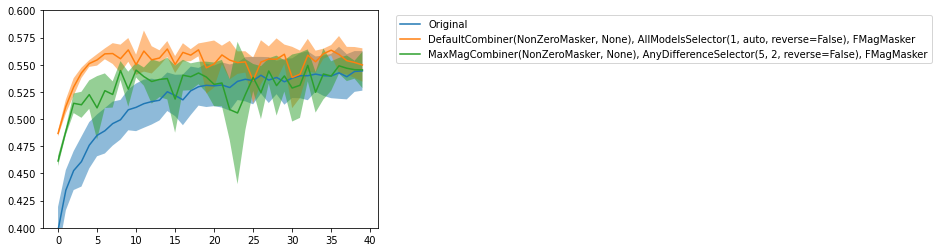

In [25]:
es_max_mag_only.plot_results(ylim=[.4, .6], draw_indices=[2, 0])

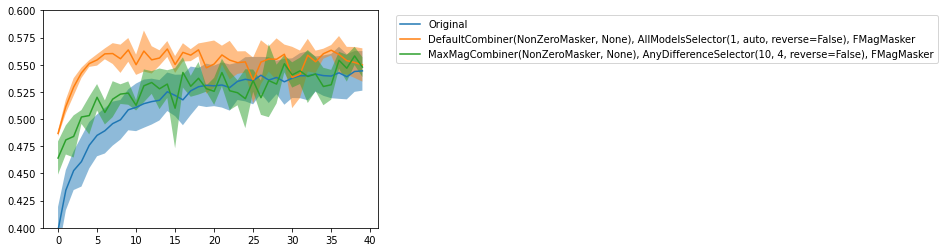

In [26]:
es_max_mag_only.plot_results(ylim=[.4, .6], draw_indices=[2, 1])